In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transnp.pile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.job import job_monitor
provider = IBMQ.load_account()

/tmp/ipykernel_117/2779030276.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [6]:
def c3x_1(qc, c_list, t):
    a, b, c = c_list

    qc.barrier()
    qc.h(t)
    qc.p(np.pi/8, a)
    qc.p(np.pi/8, b)
    qc.p(np.pi/8, c)
    qc.p(np.pi/8, t)
    qc.cx(a, b)
    qc.p(-np.pi/8, b)
    qc.cx(a, b)
    qc.cx(b, c)
    qc.p(-np.pi/8, c)
    qc.cx(a, c)
    qc.p(np.pi/8, c)
    qc.cx(b, c)
    qc.p(-np.pi/8, c)
    qc.cx(a, c)
    qc.cx(c, t)
    qc.p(-np.pi/8, t)
    qc.cx(b, t)
    qc.p(np.pi/8, t)
    qc.cx(c, t)
    qc.p(-np.pi/8, t)
    qc.cx(a, t)
    qc.p(np.pi/8, t)
    qc.cx(c, t)
    qc.p(-np.pi/8, t)
    qc.cx(b, t)
    qc.p(np.pi/8, t)
    qc.cx(c, t)
    qc.p(-np.pi/8, t)
    qc.cx(a, t)
    qc.h(t)
    qc.barrier()


In [9]:
#c3x_2ゲートの実装
def c3x_2(qc,c1,c2,c3,t,a):
    qc.ccx(c1,c2,a)
    qc.ccx(c3,a,t)
    qc.ccx(c1,c2,a)

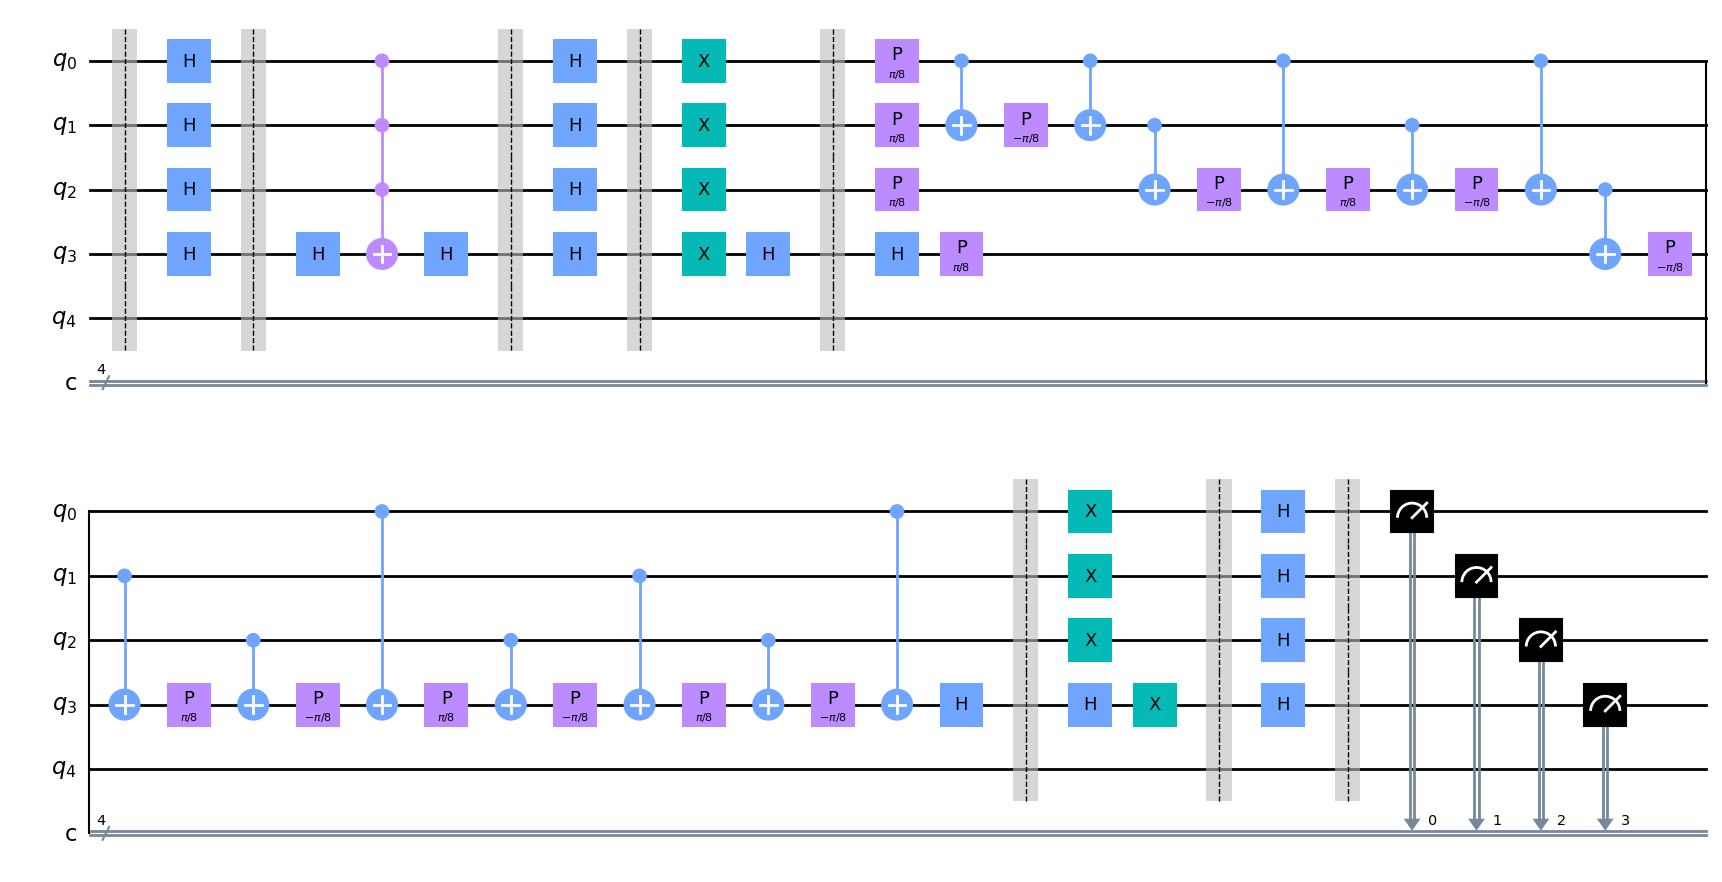

In [13]:
#c3x_2ゲート実装のために5qubit用いる
#量子ビット数と古典ビット数
q = 5
c = 4


#全ての古典bitにアダマールをかける回路。オラクル回路と位相回路の間に挟む
circ_h = QuantumCircuit(q, c)
circ_h.barrier()
for i in range(0,q-1):
    circ_h.h(i)

    
#オラクル回路
circ_o = QuantumCircuit(q, c)
circ_o.barrier()

#7と15を解とする
#circ_o.ccx(0,1,4)
#circ_o.cz(4,2)
#circ_o.ccx(0,1,4)

#15を解とする
circ_o.h(3)
circ_o.mct([0,1,2],3)
circ_o.h(3)
    

#位相回路
circ_p = QuantumCircuit(q, c)
circ_p.barrier()
for i in range(0,q-1):
    circ_p.x(i)
circ_p.h(3)
#c3x_2(circ_p,0,1,2,3,4)
c3x_1(circ_p,[0,1,2],3)
circ_p.h(3)
for i in range(0,q-1):
    circ_p.x(i)

#グローバーの繰り返し回路
circ_g = circ_o.compose(circ_h).compose(circ_p).compose(circ_h)

#測定
meas = QuantumCircuit(q, c)
meas.barrier()
meas.measure([0,1,2,3],[0,1,2,3])


#n回繰り返す回路を作る関数
def repeat_circuit(n):
    circ = circ_h
    for i in range(0,n):
        circ = circ.compose(circ_g)
    circ = circ.compose(meas)
    return circ


#回路を表示
repeat_circuit(1).draw(output='mpl')

In [14]:
#シミュレータで試す
simulator = Aer.get_backend('qasm_simulator')

#回路の最大繰り返し回数
n = 15

#ショット数、結果の格納庫を用意
shots = 2048
results_sim = []

#回路をシミュレート、測定結果を取得して配列に
for i in range(1,n+1):
    job_sim = simulator.run(transpile(repeat_circuit(i), backend=simulator), shots=shots)
    results_sim.append(job_sim.result().get_counts(repeat_circuit(i)))

#各状態の確率を格納する配列を用意
probability_sim = []

#結果から確率を計算し、配列に
for counts in results_sim:
    a0 = list(counts.values())
    ntotal = sum(a0)
    p0000 = counts.get('0000', 0) / ntotal
    p0001 = counts.get('0001', 0) / ntotal
    p0010 = counts.get('0010', 0) / ntotal
    p0011 = counts.get('0011', 0) / ntotal
    p0100 = counts.get('0100', 0) / ntotal
    p0101 = counts.get('0101', 0) / ntotal
    p0110 = counts.get('0110', 0) / ntotal
    p0111 = counts.get('0111', 0) / ntotal
    p1000 = counts.get('1000', 0) / ntotal
    p1001 = counts.get('1001', 0) / ntotal
    p1010 = counts.get('1010', 0) / ntotal
    p1011 = counts.get('1011', 0) / ntotal
    p1100 = counts.get('1100', 0) / ntotal
    p1101 = counts.get('1101', 0) / ntotal
    p1110 = counts.get('1110', 0) / ntotal
    p1111 = counts.get('1111', 0) / ntotal
    a = [p0000, p0001, p0010, p0011, p0100, p0101, p0110, p0111, p1000, p1001, p1010, p1011, p1100, p1101, p1110, p1111]
    probability_sim.append(a)

import pandas as pd
df = pd.DataFrame(probability_sim)
# 表示
print(df)

          0         1         2         3         4         5         6   \
0   0.036621  0.037598  0.033691  0.032227  0.033203  0.033691  0.033691   
1   0.004395  0.008301  0.007812  0.006836  0.004883  0.004883  0.005859   
2   0.003418  0.002441  0.002930  0.001465  0.004883  0.000977  0.001953   
3   0.025879  0.027344  0.026855  0.030273  0.029785  0.031250  0.027344   
4   0.061523  0.056641  0.069336  0.059082  0.068359  0.054199  0.054688   
5   0.066406  0.066895  0.067871  0.063965  0.058594  0.058594  0.066406   
6   0.034668  0.046875  0.045410  0.046387  0.043457  0.034668  0.044434   
7   0.008789  0.009766  0.008789  0.008301  0.015137  0.011719  0.009277   
8   0.000977  0.000488  0.000000  0.000977  0.000977  0.000000  0.000488   
9   0.022461  0.021484  0.014160  0.026367  0.022461  0.021484  0.018555   
10  0.050781  0.052246  0.051270  0.057617  0.047363  0.060059  0.051270   
11  0.067383  0.069824  0.066895  0.071289  0.063965  0.065430  0.064453   
12  0.051270

In [4]:
#プロバイダーの設定
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance='ibm-q-utokyo/internal/adv-sci-1a-2023s')

back=provider.backends()

for i in back:
    print(i)

<IBMBackend('ibm_auckland')>
<IBMBackend('ibm_brisbane')>
<IBMBackend('ibm_sherbrooke')>
<IBMBackend('ibmq_kolkata')>
<IBMBackend('ibmq_lima')>
<IBMBackend('ibm_algiers')>
<IBMBackend('ibm_kawasaki')>
<IBMBackend('ibm_perth')>
<IBMBackend('ibmq_belem')>
<IBMBackend('simulator_stabilizer')>
<IBMBackend('ibm_cairo')>
<IBMBackend('ibm_hanoi')>
<IBMBackend('ibm_lagos')>
<IBMBackend('ibmq_manila')>
<IBMBackend('ibmq_mumbai')>
<IBMBackend('ibmq_qasm_simulator')>
<IBMBackend('ibmq_quito')>
<IBMBackend('simulator_mps')>
<IBMBackend('ibm_nairobi')>
<IBMBackend('ibmq_guadalupe')>
<IBMBackend('ibmq_jakarta')>
<IBMBackend('simulator_extended_stabilizer')>
<IBMBackend('simulator_statevector')>
<IBMBackend('ibm_nazca')>


In [ ]:
#デバイスを取得
device=back[6]

#回路の最大繰り返し回数
n = 6

#ショット数、結果の格納庫を用意
shots = 2048
results_exp = []

#回路を実行、測定結果を取得して配列に
for i in range(1,n+1):
    job_exp = execute(repeat_circuit(i), backend = device, shots=shots)
    results_exp.append(job_exp.result().get_counts(repeat_circuit(i)))

In [1]:
#各状態の確率を格納する配列を用意
probability_exp = []

#結果から確率を計算し、配列に
for counts in results_exp:
    a0 = list(counts.values())
    ntotal = sum(a0)
    p000 = counts.get('000', 0) / ntotal
    p001 = counts.get('001', 0) / ntotal
    p010 = counts.get('010', 0) / ntotal
    p011 = counts.get('011', 0) / ntotal
    p100 = counts.get('100', 0) / ntotal
    p101 = counts.get('101', 0) / ntotal
    p110 = counts.get('110', 0) / ntotal
    p111 = counts.get('111', 0) / ntotal
    a = [p000, p001, p010, p011, p100, p101, p110, p111]
    probability_exp.append(a)

# 表示
print(probability_exp)

Traceback (most recent call last):
  Cell In[1], line 5
    for counts in results_exp:
NameError: name 'results_exp' is not defined

Use %tb to get the full traceback.
